# Importing Autos Data Set

First, we must read in our Autos.csv dataset

In [127]:
import pandas as pd

url = 'https://raw.githubusercontent.com/KaeCan/ML_Portfolio/main/sklearn/Auto.csv'
df = pd.read_csv(url)

print(df.head())

print(f'\nDF Dimensions: {df.shape}')

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

DF Dimensions: (392, 9)


Outputting the dimensions, we notice that it is 392 rows by 9 columns.

# Data Exploration

Let's explore some statistics about our data and some columns.

In [128]:
df[['mpg', 'weight', 'year']].describe(include='all')

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


We are finding a lot of information from these three columns.
For miles per gallon (mpg), we observe the following:

- Mean is 23.44
- Range is 35
  
For the weight, we observe:

- Mean is 3000
- Range is 3500 (This is really large, as the variance in weight may be affected by the size of different car models)

For the year, we observe:
- Mean is 76 (The format for the years is in 19xx, therefore the mean year is 1976)
- Range is 12

In [129]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

We want to convert the cylinders and origin column to categorical.

In [130]:
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')

print(df.dtypes)
print(df.head())

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          4         307.0         130    3504          12.0  70.0   
1  15.0          4         350.0         165    3693          11.5  70.0   
2  18.0          4         318.0         150    3436          11.0  70.0   
3  16.0          4         304.0         150    3433          12.0  70.0   
4  17.0          4         302.0         140    3449           NaN  70.0   

  origin                       name  
0      1  chevrolet chevelle malibu  
1      1          buick skylark 320  
2      1         plymouth satellite  
3      1              amc rebel sst  
4      1                ford torino  


Let's remove NA values. We do this by first checking for NAs in the columns.

In [131]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

There are NAs in the acceleration and year columns. Let's drop them then recheck the overall dimensions.

In [132]:
df = df.dropna()
print(df.isnull().sum())
print(f'DF Dimensions: {df.shape}')

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
DF Dimensions: (389, 9)


Now, let's create a new column named mpg_high. We need to make it categorical under the conditions that if an mpg observation is greater than the mean mpg, then we set the column value to 1, else it is 0. 

In [133]:
df['mpg_high'] = pd.cut(df['mpg'], bins=[0, df['mpg'].mean(), float('Inf')], labels=[0,1])

df.loc[0:5,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high
0,18.0,4,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,0
1,15.0,4,350.0,165,3693,11.5,70.0,1,buick skylark 320,0
2,18.0,4,318.0,150,3436,11.0,70.0,1,plymouth satellite,0
3,16.0,4,304.0,150,3433,12.0,70.0,1,amc rebel sst,0


We can also delete the mpg and name columns to make sure sklearn doesn't predict mpg_high using those columns.

In [134]:
df = df.drop(columns=['mpg', 'name'])
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


# Graph Exploration using Seaborn

First, we import seaborn for graphical exploration. Seaborn provides easy data visualization.

The first plot is a categorical plot for mpg_high. The x label is whether an observation's was determined to be greater than the mean mpg. The y label is the count.

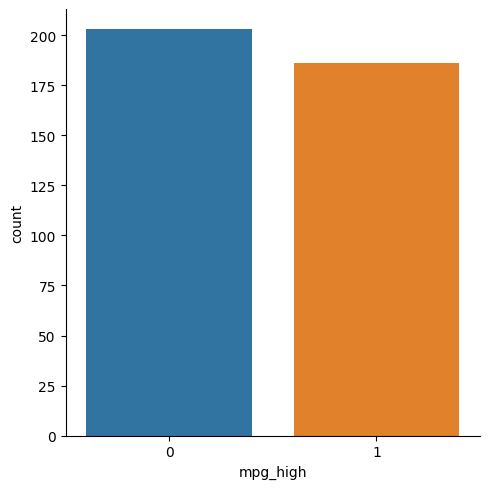

In [135]:
import seaborn as sb

sb.catplot(x='mpg_high', kind='count', data=df)

In [136]:
zero = df['mpg_high'].value_counts()[0]
one = df['mpg_high'].value_counts()[1]

print(f'Instances of mpg_high = 0 : {zero}')
print(f'Instances of mpg_high = 1 : {one}')

Instances of mpg_high = 0 : 203
Instances of mpg_high = 1 : 186


we can see that there are less observations where the mpg was greater than the mean mpg compared to the number of observations where the mpg was less or equal to the mean mpg.

The next plot will be a Seaborn Relational Plot for horsepower vs weight.

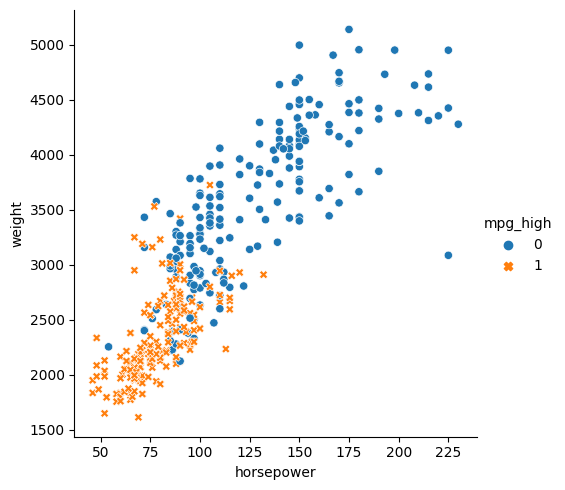

In [137]:
sb.relplot(x='horsepower', y='weight', data=df, hue=df.mpg_high, style=df.mpg_high)

Notice how most of the observations where mpg_high = 1 are generally closer to the origin than the observations where mpg_high = 0. This may indicate that heavier cars generally have lower mileage than those that are lighter. Additionally, higher horsepower may negatively affect the mileage on a car.

Next, we will be creating a boxplot with mpg_high on the x axis and weight on the y axis.

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

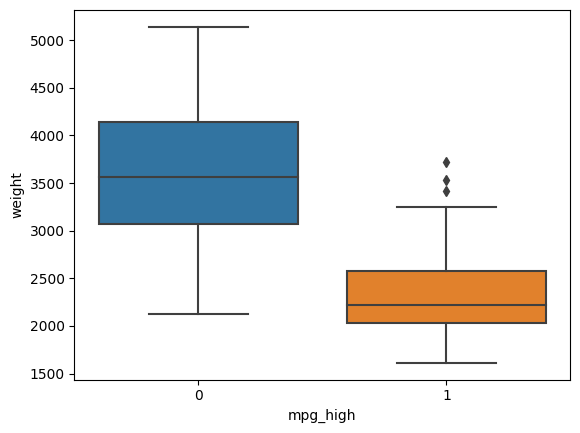

In [138]:
sb.boxplot(x='mpg_high', y='weight', data=df)

Again, we observe that weight may negatively affect the mpg of a car. We see that lower weighted cars generally have an mpg greater than the mean.

# Train / Test Split

Let's print the dataframe just to be sure everything looks good before doing the train/test split.

In [139]:
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


Sklearn offers built-in support to divide data into training and testing portions. We want to do this to isolate the training data from the testing so that we know our model is actually trying to predict unseen values.

We will use 1234 as our seed for standardization.

In [140]:
from sklearn.model_selection import train_test_split

x = df.loc[:, ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
y = df.mpg_high

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=1234)

print(f'Train size: {x_train.shape}')
print(f'Test size: {x_test.shape}')

Train size: (311, 7)
Test size: (78, 7)


# Logistic Regression

Let's import the logistic regression package from sklearn and fit it to our data. We wil use solver lbfgs (the default algorithm) in the optimization problem.

In [141]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=500)


logreg.fit(x_train, y_train)
score = logreg.score(x_train, y_train)
print(f'Model score: {score}')

Model score: 0.9035369774919614


We will now create a prediction and attempt to predict our test data. Below, we've printed the prediction metrics.

In [142]:
from sklearn.metrics import classification_report

lr_pred = logreg.predict(x_test)

print(classification_report(y_test, lr_pred))


              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78



In [143]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, lr_pred))

[[42  8]
 [ 0 28]]


Above, we have created a confusion matric to see that our model only predicted 8 wrong.

# Decision Trees

Next, we will attempt to predict mpg_high using decision trees.

In [144]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

Now, let's predict mpg_high. Keep in mind that results will vary across different runs.

In [145]:
dt_pred = dt.predict(x_test)

print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.87      0.96      0.92        28

    accuracy                           0.94        78
   macro avg       0.92      0.94      0.93        78
weighted avg       0.94      0.94      0.94        78



Our accuracy for this run is 94%, but like mentioned previously, different runs will have different accuracies.

Let's visualize the tree.

[Text(0.6433823529411765, 0.9444444444444444, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'X[4] <= 13.75\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'X

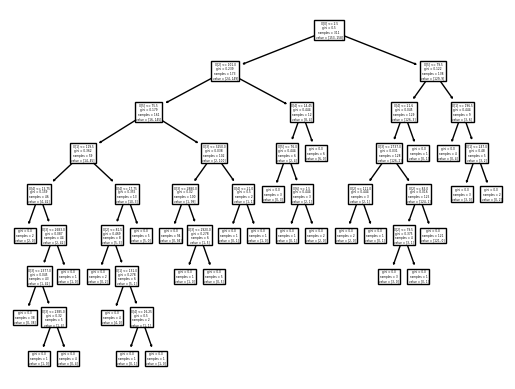

In [146]:
from sklearn.datasets import load_iris
from sklearn import tree

iris = load_iris()
tree.plot_tree(dt)

# Neural Networks

Lastly, we will attempt to predict mpg_high using neural networks.

We will need to preprocess our data first.

In [147]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Now we can begin training our neural network. Our choice network topology will be lbfgs.

In [153]:
from sklearn.neural_network import MLPClassifier

neural = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7,4), max_iter=250, random_state=1234)
neural.fit(x_train_scaled, y_train)


MLPClassifier(hidden_layer_sizes=(7, 4), max_iter=250, random_state=1234,
              solver='lbfgs')

Let's predict using our model and output the metrics.

In [154]:
neural_pred = neural.predict(x_test_scaled)

print(classification_report(y_test, neural_pred))

print(confusion_matrix(y_test, neural_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.79      0.93      0.85        28

    accuracy                           0.88        78
   macro avg       0.87      0.89      0.88        78
weighted avg       0.90      0.88      0.89        78

[[43  7]
 [ 2 26]]


Let's try to train another model with different network topology. We will instead use sgd, change the layer sizes, increase max iterations.

In [155]:
neural2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(4, 2), max_iter=1000, random_state=1234)
neural2.fit(x_train_scaled, y_train)

c:\Users\fireb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(4, 2), max_iter=1000, random_state=1234,
              solver='sgd')

Now, let's predict using our new model and output metrics.

In [156]:
neural2_pred = neural.predict(x_test_scaled)

print(classification_report(y_test, neural2_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.79      0.93      0.85        28

    accuracy                           0.88        78
   macro avg       0.87      0.89      0.88        78
weighted avg       0.90      0.88      0.89        78



We can see that the two models are very similar in their accuracies. Despite having more iterations and a different solver, the predictions remain relatively unchanged. Sgd is suggested to be faster and simpler to implement, but lbfgs creates more optimal results at a higher performance cost. Overall, both models resulted in solid performance.

# Analysis

Let's reprint the classification metrics for all methods.

In [157]:
print('Logistic Regression')
print(classification_report(y_test, lr_pred))

print('Decision Tree')
print(classification_report(y_test, dt_pred))

print('Neural Network (lbfgs)')
print(classification_report(y_test, neural_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        50
           1       0.78      1.00      0.88        28

    accuracy                           0.90        78
   macro avg       0.89      0.92      0.89        78
weighted avg       0.92      0.90      0.90        78

Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        50
           1       0.87      0.96      0.92        28

    accuracy                           0.94        78
   macro avg       0.92      0.94      0.93        78
weighted avg       0.94      0.94      0.94        78

Neural Network (lbfgs)
              precision    recall  f1-score   support

           0       0.96      0.86      0.91        50
           1       0.79      0.93      0.85        28

    accuracy                           0.88        78
   macro avg       0.87      0.89      0.88        78
weighted avg     

We can see that our decision tree model performed the best, logistic regression the second best, and neural networks the worst. Despite this, all algorithms performed well with high accuracies. Our decision tree performing the best may be the result of decision trees working better with multi-class categorical predictors (such as 'cylinders') than neural networks. Neural networks handle binary-class categorical predictors better, but some columns have more classes than that. Neural networks are also generally more complex and require more tuning, while decision trees are easier to interpret. We can easily visualize the shape of our tree when plotted. Logistic regression performed well, but is generally not well-suited for columns with categorical variables, regardless of being binary or multi-class.

# R vs sklearn

After using both, I personally find sklearn to be easier to use. I am already comfortable with Python, and although R was a relatively easy language to learn, I still much prefer the syntax and structure of Python code. Documentation in both languages are very well-written, but the overall experience of Python felt more streamlined regarding packages (e.g. seaborn, pandas) and their implementation (e.g. sklearn's LogisticRegression, DecisionTreeClassifier).